In [65]:
import os
import sys
sys.path.append('/home/psavine/source/viper')
sys.path.append("../")
import matplotlib
import numpy as np
import shapely

In [13]:
sys.path

['',
 '/home/psavine/source/viper/jupyter',
 '/home/psavine/anaconda3/envs/viper/lib/python37.zip',
 '/home/psavine/anaconda3/envs/viper/lib/python3.7',
 '/home/psavine/anaconda3/envs/viper/lib/python3.7/lib-dynload',
 '/home/psavine/anaconda3/envs/viper/lib/python3.7/site-packages',
 '/home/psavine/anaconda3/envs/viper/lib/python3.7/site-packages/meshcat-0.0.10-py3.7.egg',
 '/home/psavine/anaconda3/envs/viper/lib/python3.7/site-packages/torchvision-0.2.1-py3.7.egg',
 '/home/psavine/anaconda3/envs/viper/lib/python3.7/site-packages/IPython/extensions',
 '/home/psavine/.ipython',
 '/home/psavine/source/viper',
 '/home/psavine/source/viper',
 '../']

In [34]:
import spec.hvac
import importlib
importlib.reload(spec.hvac)
T = spec.hvac.TestHvacSys()
T.setUp()
system, solids = T.test_build3()

/home/psavine/anaconda3/envs/viper/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2917: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/psavine/anaconda3/envs/viper/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


layers :1172 
centroids: 1172 
starts: 1173 
Counter({0: 496, 2: 346, 1: 279, 3: 15, 5: 6, 4: 3})


(array([1.00e+00, 1.20e+01, 1.05e+03, 1.04e+02, 4.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([-21369.18577294, -13892.53496005,  -6415.88414715,   1060.76666574,
          8537.41747863,  16014.06829152,  23490.71910441,  30967.36991731,
         38444.0207302 ,  45920.67154309,  53397.32235598]),
 <a list of 10 Patch objects>)

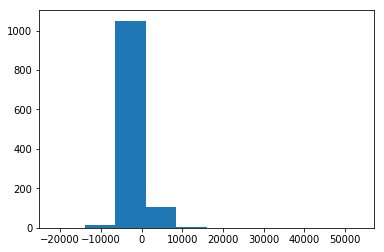

In [26]:
[x.process() for x in solids]
matplotlib.pyplot.hist([x.volume for x in solids])

(array([1045.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         127.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

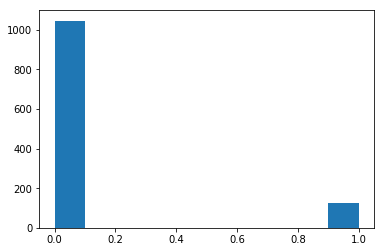

In [27]:
matplotlib.pyplot.hist([int(x.is_watertight) for x in solids])

(array([993.,  92.,  68.,  14.,   3.,   0.,   0.,   1.,   0.,   1.]),
 array([  4.,  54., 104., 154., 204., 254., 304., 354., 404., 454., 504.]),
 <a list of 10 Patch objects>)

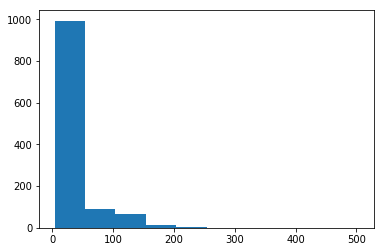

In [28]:
matplotlib.pyplot.hist([len(x.points) for x in solids])

In [172]:
w2 = [k for k, v in system.res.items() if len(v) == 2][0]
solid = solids[w2]
n1, n2 = [solids[i] for i in system.res[w2]]

In [58]:
visual.visualize_indexed([x.convex_hull for x in solids])

QhullError: QH6022 qhull input error: 2'th dimension's new bounds [-0.5, 0.5] too wide for
existing bounds [-8.9, -8.9]

While executing:  | qhull i Pp QbB Qt
Options selected for Qhull 2015.2.r 2016/01/18:
  run-id 696331738  incidence  Pprecision-ignore  QbBound-unit-box 0.5
  Qtriangulate  _pre-merge  _zero-centrum


In [255]:
def connector_approx(mesh, conn_ix):
    adj_ixs = np.where(mesh.face_adjacency == conn_ix)[0]
    angles = np.where(np.isclose( mesh.face_adjacency_angles[adj_ixs],  0.0, atol=1e-04))
    adj_with_same = adj_ixs[angles].squeeze()
    # print('adj_with_same', adj_with_same)
    adj_pair = mesh.face_adjacency[adj_with_same]
    vertices = mesh.faces[adj_pair]
    unique_v = np.unique(np.asarray(vertices))
    
    center = mesh.vertices[unique_v].mean(axis=0)
    return center


def connector_face(mesh1, mesh2):
    ch1 = mesh1.convex_hull
    ch2 = mesh2.convex_hull
    # print(ch1.is_watertight, ch2.is_watertight)
    loc1, ray_ix1, tri_ix1 = ch1.ray.intersects_location([ch1.centroid], [ch1.centroid - ch2.centroid])
    loc2, ray_ix2, tri_ix2 = ch2.ray.intersects_location([ch2.centroid], [ch2.centroid - ch1.centroid])
    
    # print('nface : ', ch1.faces.shape[0], ch2.faces.shape[0] )
    # print('tri_ix1 : ', tri_ix1, tri_ix2)
    # get any faces that can be merged 
    # new estimate will be the centroid of these 
    # print(loc1, loc2)
    cent1 = connector_approx(ch1, tri_ix1)
    cent2 = connector_approx(ch2, tri_ix2)
    return cent1, cent2
    

True True
nface :  28 60
tri_ix1 :  [4] [44]
adj_with_same 27
adj_with_same []
True True
nface :  28 32
tri_ix1 :  [26] [31]
adj_with_same 35
adj_with_same 35
[735.25486272 -14.0287443   -1.84595069] [738.12986272 -10.9037443   -1.84595069]


/home/psavine/anaconda3/envs/viper/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
/home/psavine/anaconda3/envs/viper/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [129]:
from trimesh.path.path import Path
from src.ui import visual
from src.ui.visual import meshcat

importlib.reload(visual)

v = visual.Visualizer(zmq_url=visual._zmq_url)
xs = [solid, n1, n2]
# visual.visualize_indexed([x.convex_hull for x in xs])

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


In [119]:
handle = '1537921493'
import random


def line_hull(m1, m2):
    # hnd = str(random.random())
    _p = np.array([0,0,0.1])
    _y = np.array([0,0.1,0])
    _x = np.array([0.1,0,0])
    c1 = m1.centroid
    c2 = m2.centroid
    ls = trimesh.Trimesh(vertices=[c1, c2, c1 + _p, c2 + _p, c1 - _p, c2 - _p, c1 + _y, c2 + _y, c1 - _y, c2 - _y])
    mg = meshcat.geometry.ObjMeshGeometry(ls.convex_hull.export(file_type='obj'))
    v[handle + '/' + str(random.random())].set_object(mg)

In [251]:
# visual.visualize_points([c3])
visual.visualize_points([x.convex_hull.centroid for x in xs ])

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


'1537926890'

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


'1537926977'

In [256]:
c1, c2 = connector_face(solid, n1)
c3, c4 = connector_face(solid, n2)

print(c1, c3)

[735.25486272 -14.0287443   -1.84595069] [738.12986272 -10.9037443   -1.84595069]


/home/psavine/anaconda3/envs/viper/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
/home/psavine/anaconda3/envs/viper/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
